## Task 1
#### Implement Nearest Neighbor

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # This library is used only for getting image

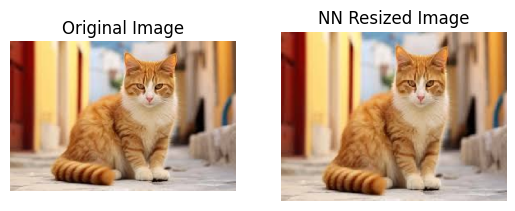

In [9]:
def nearest_neighbor_resize(image, new_width, new_height):
    old_width, old_height = image.shape[1], image.shape[0]
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            old_x = int(i * old_height / new_height)
            old_y = int(j * old_width / new_width)
            resized_image[i, j] = image[old_x, old_y]
    
    return resized_image

image = np.array(Image.open('download.jpg'))

# Resize using Nearest Neighbor
resized_image = nearest_neighbor_resize(image, 400, 300)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('NN Resized Image')
plt.axis('off')

plt.show()


## Task2
#### Bilinear Interpolation and Resizing

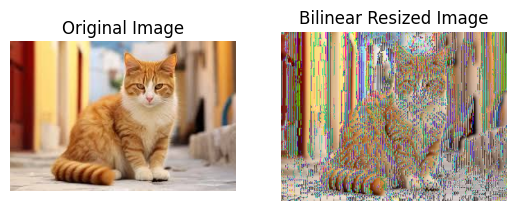

In [10]:
def bilinear_interpolation_resize(image, new_width, new_height):
    old_width, old_height = image.shape[1], image.shape[0]
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x_ratio = (old_height - 1) / new_height
            y_ratio = (old_width - 1) / new_width
            x, y = i * x_ratio, j * y_ratio
            
            x_floor, y_floor = np.floor(x).astype(int), np.floor(y).astype(int)
            x_ceil, y_ceil = min(x_floor + 1, old_height - 1), min(y_floor + 1, old_width - 1)
            
            top_left = image[x_floor, y_floor]
            top_right = image[x_floor, y_ceil]
            bottom_left = image[x_ceil, y_floor]
            bottom_right = image[x_ceil, y_ceil]
            
            dx, dy = x - x_floor, y - y_floor
            top = top_left + (top_right - top_left) * dy
            bottom = bottom_left + (bottom_right - bottom_left) * dy
            pixel_value = top + (bottom - top) * dx
            resized_image[i, j] = pixel_value
    
    return resized_image

# Resize using Bilinear Interpolation
bilinear_resized_image = bilinear_interpolation_resize(image, 400, 300)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilinear_resized_image)
plt.title('Bilinear Resized Image')
plt.axis('off')

plt.show()

## Task 3
#### Implement Convolution

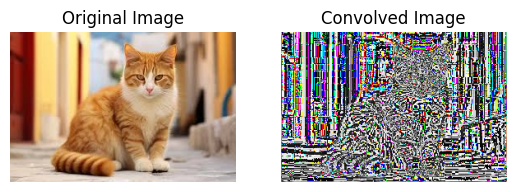

In [11]:
def apply_convolution(image, kernel):
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant')
    output_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for c in range(3):
                output_image[i, j, c] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size, c] * kernel)
    
    output_image = np.clip(output_image, 0, 255)
    return output_image

kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply Convolution
convolved_image = apply_convolution(image, kernel)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image)
plt.title('Convolved Image')
plt.axis('off')

plt.show()


## Task 4
#### Gaussian Filter

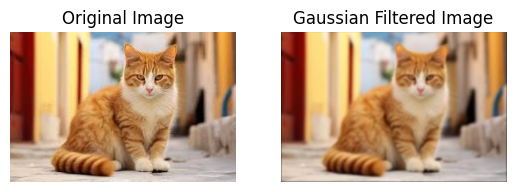

In [12]:
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gaussian_kernel_ = gaussian_kernel(5, sigma=1)
gaussian_filtered_image = apply_convolution(image, gaussian_kernel_)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered_image)
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.show()
